<a href="https://colab.research.google.com/github/Elizabeth341/Estadistica/blob/main/Pr%C3%A1ctica_Examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Elizabeth341/Estadistica/refs/heads/main/data.csv")
df.dropna(inplace = True)
df

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0
...,...,...,...,...
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4


Coeficiente de correlación: 0.9227

Coeficiente de determinación:  0.8514

intervalo de confianza para b1 de  98%
 5.2890 < b1 <  6.1729



,df,sum_sq,mean_sq,F,PR(>F)
Duration,1.0,9.847530e+06,9.847530e+06,928.219489,5.795220e-69
Residual,162.0,1.718667e+06,1.060905e+04,NaN,NaN


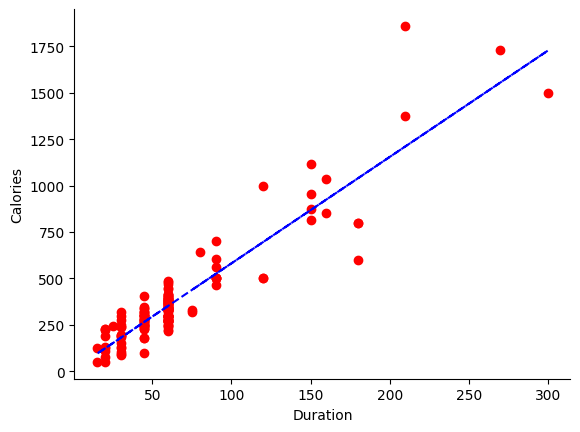

In [34]:
# 1. Establesca una variable dependiente ( Y ) y una variable independiente ( X ).
X = df['Duration']
Y = df['Calories']


# 2. Realiza un gráfico con la dispersión y la recta de regresión ajustada.
import matplotlib.pyplot as plt
plt.scatter(X, Y, color = 'red')
plt.xlabel('Duration')
plt.ylabel('Calories')
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


import statsmodels.api as sm
x_constante = sm.add_constant(X)
modelo = sm.OLS(Y, x_constante).fit()

b0, b1 = modelo.params

fun = lambda x: b0 + b1 * x

Yc = fun(X)

plt.plot(X, Yc, color = 'blue', linestyle = '--')


# 3. Calcula el coeficiente de correlación y el coeficiente de determinación e interpreta los resultados.
from scipy.stats import pearsonr
r, _ = pearsonr(X, Y)
print(f'Coeficiente de correlación: {r:0.4f}\n')

from sklearn.metrics import r2_score
r2 = r2_score(Y, Yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')


  # Coeficiente de correlación: Hay una relación lineal fuerte entre las dos variables.
  # Coeficiente de determinación:  Significa que Y esta sujeto a X con un 85% de variación.

# 4. Obtén un intervalo de confianza de 98% para la pendiente e interpreta el resultado. Respalda tu conclusión usando ANOVA.
nivel_de_confianza = 0.98
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

from statsmodels.formula.api import ols
# Y ~ X
modelo_2 = ols('Calories ~ Duration', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_2)
tabla_anova

  # Podemos concluir que el modelo de regresión es estadísticamente significativo.

# 5. Verifica los supuestos.
  # Linealidad: Hay una relación lineal entre las variables.
  # Independencia: No hay independencia.
  # Homoscedasticidad: No hay homoscedasticidad.